In [1]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

## Dane

In [2]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 10)
    finish = start + np.random.randint(3, 20)
    sentence = [str(x)for x in range(start, finish)]
    
    sentences.append(sentence)

## Model Word2Vec

In [3]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

C:\Users\PC\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [4]:
model.wv['3']

array([-2.3973641 ,  2.9171727 ,  2.9582863 ,  0.5444994 ,  0.9271145 ,
        0.50090617,  0.20134103, -0.30994806,  2.3329697 , -1.1848922 ],
      dtype=float32)

In [6]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

C:\Users\PC\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


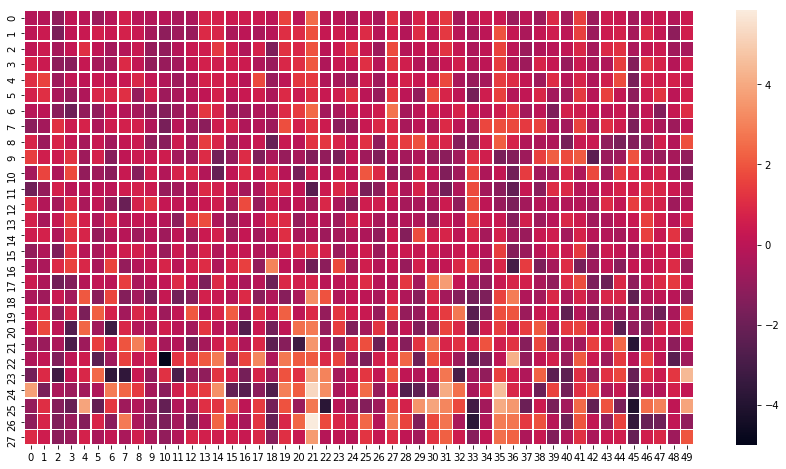

In [7]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

## PCA

In [13]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

C:\Users\PC\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


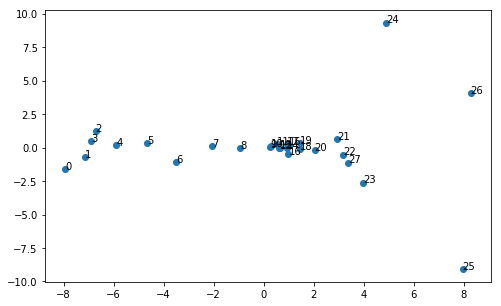

In [14]:
plot_pca(Word2Vec(sentences, size=50, window=10))

## Podobne słowa

In [16]:
model = Word2Vec(sentences, size=50, window=5)

C:\Users\PC\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [17]:
model.wv.most_similar('10', topn=3)

[('12', 0.5660315752029419),
 ('26', 0.5532500743865967),
 ('9', 0.5254659056663513)]

In [18]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('26', 0.6306315064430237),
 ('12', 0.571359395980835),
 ('9', 0.5165181159973145)]